      Timestamp Latitude  Longitude
0    1657534460  -7.3492   127.7817
1    1657534470  -6.8185   128.1660
2    1657534481  -6.2873   128.5494
3    1657534491  -5.7559   128.9320
4    1657534501  -5.2494   129.2955
..          ...      ...        ...
115  1657535652  46.5422  -174.7133
116  1657535663  46.8319  -173.8594
117  1657535673  47.1145  -172.9957
118  1657535684  47.3768  -172.1644
119  1657535694  47.6451  -171.2822

[120 rows x 3 columns]


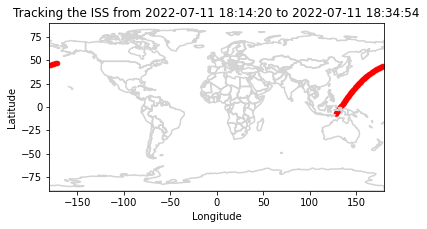

In [17]:
import fiona
import requests as req
import matplotlib.pyplot as plt
%matplotlib inline  
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import json
import time
from datetime import datetime



data = []

for i in range(0,120):
    resp = req.get("http://api.open-notify.org/iss-now.json")
    text = resp.text
    obj = json.loads(text)  
    
    data.append((obj["timestamp"], obj['iss_position']['latitude'], obj['iss_position']['longitude']))
    time.sleep(10)

df = pd.DataFrame(data, columns = ['Timestamp', 'Latitude','Longitude'])
print(pd.DataFrame(df))

df[["Latitude", "Longitude"]] = df[["Latitude", "Longitude"]].apply(pd.to_numeric)

worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap.boundary.plot(color ="lightgray") #i have no clue why worldmap.plot() does not work at all,,, 

x = df['Longitude']
y = df['Latitude']

plt.scatter(x, y, s=20, c="red", alpha=0.6, vmin=0, vmax=None)

plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title(f'Tracking the ISS from {datetime.fromtimestamp(data[0][0])} to {datetime.fromtimestamp(data[119][0])}')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()